In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"FUNCIONES"

def budget_constraint(p1, p2, y, x1):
    
    return y/p2 - (p1/p2)*x1

In [3]:
"PARÁMETROS Y VARIABLES EXÓGENAS"

escenarios = 6 

p1    = np.full(escenarios, 1.2, dtype = float)    
p2    = np.full(escenarios, 2.5, dtype = float)    
x1min = np.full(escenarios, 2.5, dtype = float)
c     = np.full(escenarios, 0.3, dtype = float)
y     = np.full(escenarios, 10, dtype = float)
x1    = np.arange(0, 10, 0.01)

In [4]:
"SHOCKS"

escenarios = 6

for i in range (1, escenarios):
    
    if i == 1:
    
    # Escenario 1: Shock positivo del precio del bien necesario
    
        p1[i] = 1.5
       
    if i == 2:
    
    # Escenario 2: Shock positivo del precio del bien de lujo

        p2[i] = 3  
        
    if i == 3:
    
    # Escenario 3: Shock positivo del consumo mínimo del bien necesario

        x1min[i] = 3.2  
        
    if i == 4:

    # Escenario 4: Aumento del ratio c

        c[i] = 0.45 
        
    if i == 5:

    # Escenario 5: Shock positivo del ingreso

        y[i] = 11.5 

In [5]:
"EQUILIBRIO"

bc    = {}
x1max = {}
x2max = {}
x1e   = {} 
x2e   = {}

for i in range (0, escenarios):
    
    # Recta presupuestaria
    
    bc['e{0}'.format(i)]  = budget_constraint(p1[i], p2[i], y[i], x1)

    # Máxima cantidad demandad del bien necesario (x1max)
    
    x1max['e{0}'.format(i)] = y[i]/p1[i]
    
    # Máxima cantidad demandada del bien de lujo (x2max)
    
    x2max['e{0}'.format(i)] = y[i]/p2[i] - x1min[i]*p1[i]/p2[i]
                
    # Bien necesario de equilibrio (x1*)
    
    x1e['e{0}'.format(i)] = (1 - c[i])*x1min[i] + c[i]*(y[i]/p1[i])
    
    # Bien de lujo de equilibrio (x2*)
    
    x2e['e{0}'.format(i)] = -(p1[i]/p2[i])*(1 - c[i])*x1min[i] + (1 - c[i])*(y[i]/p2[i])

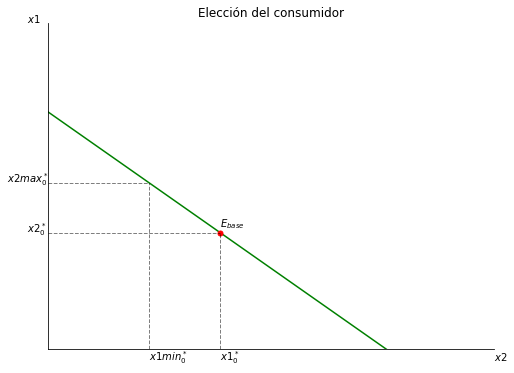

In [6]:
"ESCENARIO BASE"

xmin, xmax, ymin, ymax = 0, 11, 0, 5.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x1, bc['e0'], color= 'Green')
ax.plot(x1e['e0'], x2e['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([x1e['e0'], x1e['e0']], [0, x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1e['e0']], [x2e['e0'], x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1min[0], x1min[0]], [0, x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1min[0]], [x2max['e0'], x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Elección del consumidor')
ax.text(x1e['e0'], x2e['e0'] + 0.1, '$E_{base}$')
ax.text(-0.5, x2e['e0'], '$x2_{0}^*$')
ax.text(x1e['e0'], -0.2, '$x1_{0}^*$')
ax.text(-1, x2max['e0'], '$x2max_{0}^*$')
ax.text(x1min[0], -0.2, '$x1min_{0}^*$')
ax.text(xmin - 0.5, ymax, '$x1$')
ax.text(xmax, ymin - 0.2, '$x2$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

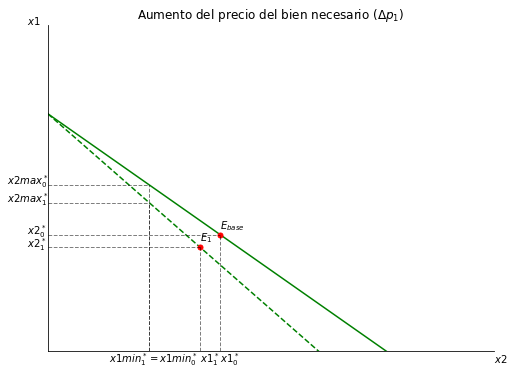

In [7]:
"ESCENARIO 1: Aumento del precio del bien necesario"

xmin, xmax, ymin, ymax = 0, 11, 0, 5.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x1, bc['e0'], color= 'Green')
ax.plot(x1, bc['e1'], color= 'Green', ls='--')
ax.plot(x1e['e0'], x2e['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(x1e['e1'], x2e['e1'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([x1e['e0'], x1e['e0']], [0, x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1e['e0']], [x2e['e0'], x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1min[0], x1min[0]], [0, x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1min[0]], [x2max['e0'], x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1e['e1'], x1e['e1']], [0, x2e['e1']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1e['e1']], [x2e['e1'], x2e['e1']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1min[1], x1min[1]], [0, x2max['e1']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1min[1]], [x2max['e1'], x2max['e1']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Aumento del precio del bien necesario ($\Delta p_{1}$)')
ax.text(x1e['e0'], x2e['e0'] + 0.1, '$E_{base}$')
ax.text(-0.5, x2e['e0'], '$x2_{0}^*$')
ax.text(x1e['e0'], -0.2, '$x1_{0}^*$')
ax.text(-1, x2max['e0'], '$x2max_{0}^*$')
ax.text(x1e['e1'], x2e['e1'] + 0.1, '$E_{1}$')
ax.text(-0.5, x2e['e1'], '$x2_{1}^*$')
ax.text(x1e['e1'], -0.2, '$x1_{1}^*$')
ax.text(-1, x2max['e1'], '$x2max_{1}^*$')
ax.text(x1min[1] - 1, -0.2, '$x1min_{1}^* = x1min_{0}^*$')
ax.text(xmin - 0.5, ymax, '$x1$')
ax.text(xmax, ymin - 0.2, '$x2$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

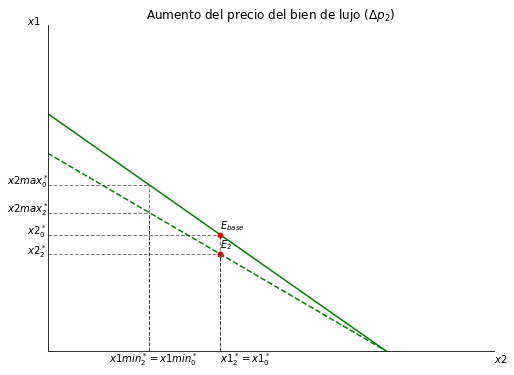

In [8]:
"ESCENARIO 2: Aumento del precio del bien de lujo"

xmin, xmax, ymin, ymax = 0, 11, 0, 5.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x1, bc['e0'], color= 'Green')
ax.plot(x1, bc['e2'], color= 'Green', ls='--')
ax.plot(x1e['e0'], x2e['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(x1e['e2'], x2e['e2'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([x1e['e0'], x1e['e0']], [0, x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1e['e0']], [x2e['e0'], x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1min[0], x1min[0]], [0, x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1min[0]], [x2max['e0'], x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1e['e2'], x1e['e2']], [0, x2e['e2']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1e['e2']], [x2e['e2'], x2e['e2']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1min[2], x1min[2]], [0, x2max['e2']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1min[2]], [x2max['e2'], x2max['e2']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Aumento del precio del bien de lujo ($\Delta p_{2}$)')
ax.text(x1e['e0'], x2e['e0'] + 0.1, '$E_{base}$')
ax.text(-0.5, x2e['e0'], '$x2_{0}^*$')
ax.text(-1, x2max['e0'], '$x2max_{0}^*$')
ax.text(x1e['e2'], x2e['e2'] + 0.1, '$E_{2}$')
ax.text(-0.5, x2e['e2'], '$x2_{2}^*$')
ax.text(x1e['e2'], -0.2, '$x1_{2}^* = x1_{0}^*$')
ax.text(-1, x2max['e2'], '$x2max_{2}^*$')
ax.text(x1min[2] - 1, -0.2, '$x1min_{2}^* = x1min_{0}^*$')
ax.text(xmin - 0.5, ymax, '$x1$')
ax.text(xmax, ymin - 0.2, '$x2$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

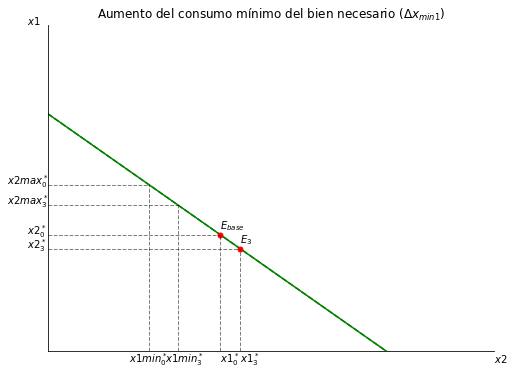

In [9]:
"ESCENARIO 3: Aumento del consumo mínimo del bien necesario"

xmin, xmax, ymin, ymax = 0, 11, 0, 5.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x1, bc['e0'], color= 'Green')
ax.plot(x1, bc['e3'], color= 'Green', ls='--')
ax.plot(x1e['e0'], x2e['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(x1e['e3'], x2e['e3'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([x1e['e0'], x1e['e0']], [0, x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1e['e0']], [x2e['e0'], x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1min[0], x1min[0]], [0, x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1min[0]], [x2max['e0'], x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1e['e3'], x1e['e3']], [0, x2e['e3']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1e['e3']], [x2e['e3'], x2e['e3']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1min[3], x1min[3]], [0, x2max['e3']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1min[3]], [x2max['e3'], x2max['e3']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Aumento del consumo mínimo del bien necesario ($\Delta x_{min1}$)')
ax.text(x1e['e0'], x2e['e0'] + 0.1, '$E_{base}$')
ax.text(-0.5, x2e['e0'], '$x2_{0}^*$')
ax.text(x1e['e0'], -0.2, '$x1_{0}^*$')
ax.text(-1, x2max['e0'], '$x2max_{0}^*$')
ax.text(x1min[0] -0.5, -0.2, '$x1min_{0}^*$')
ax.text(x1e['e3'], x2e['e3'] + 0.1, '$E_{3}$')
ax.text(-0.5, x2e['e3'], '$x2_{3}^*$')
ax.text(x1e['e3'], -0.2, '$x1_{3}^*$')
ax.text(-1, x2max['e3'], '$x2max_{3}^*$')
ax.text(x1min[3] -0.3, -0.2, '$x1min_{3}^*$')
ax.text(xmin - 0.5, ymax, '$x1$')
ax.text(xmax, ymin - 0.2, '$x2$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

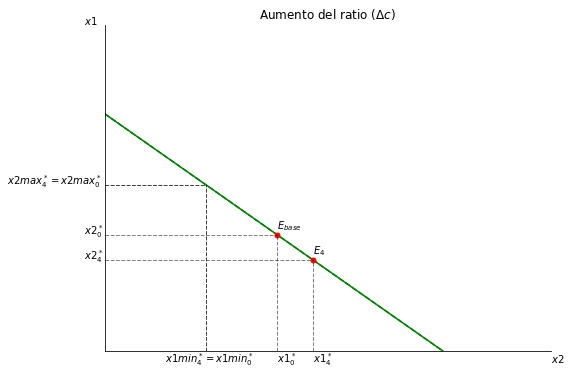

In [10]:
"ESCENARIO 4: Aumento del ratio"

xmin, xmax, ymin, ymax = 0, 11, 0, 5.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x1, bc['e0'], color= 'Green')
ax.plot(x1, bc['e3'], color= 'Green', ls='--')
ax.plot(x1e['e0'], x2e['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(x1e['e4'], x2e['e4'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([x1e['e0'], x1e['e0']], [0, x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1e['e0']], [x2e['e0'], x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1min[0], x1min[0]], [0, x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1min[0]], [x2max['e0'], x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1e['e4'], x1e['e4']], [0, x2e['e4']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1e['e4']], [x2e['e4'], x2e['e4']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1min[4], x1min[4]], [0, x2max['e4']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1min[4]], [x2max['e4'], x2max['e4']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Aumento del ratio ($\Delta c$)')
ax.text(x1e['e0'], x2e['e0'] + 0.1, '$E_{base}$')
ax.text(-0.5, x2e['e0'], '$x2_{0}^*$')
ax.text(x1e['e0'], -0.2, '$x1_{0}^*$')
ax.text(x1e['e4'], x2e['e4'] + 0.1, '$E_{4}$')
ax.text(-0.5, x2e['e4'], '$x2_{4}^*$')
ax.text(x1e['e4'], -0.2, '$x1_{4}^*$')
ax.text(-2.4, x2max['e4'], '$x2max_{4}^* = x2max_{0}^*$')
ax.text(x1min[4] -1, -0.2, '$x1min_{4}^* = x1min_{0}^*$')
ax.text(xmin - 0.5, ymax, '$x1$')
ax.text(xmax, ymin - 0.2, '$x2$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

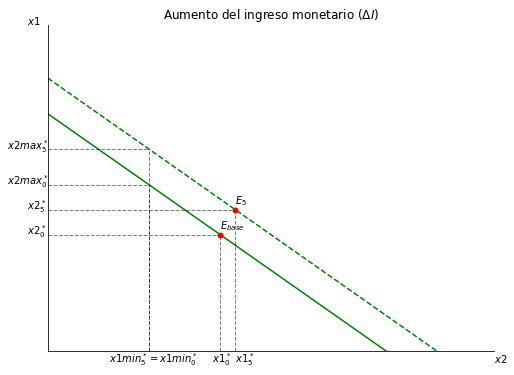

In [11]:
"ESCENARIO 5: Aumento del ingreso monetario"

xmin, xmax, ymin, ymax = 0, 11, 0, 5.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x1, bc['e0'], color= 'Green')
ax.plot(x1, bc['e5'], color= 'Green', ls='--')
ax.plot(x1e['e0'], x2e['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(x1e['e5'], x2e['e5'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([x1e['e0'], x1e['e0']], [0, x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1e['e0']], [x2e['e0'], x2e['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1min[0], x1min[0]], [0, x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1min[0]], [x2max['e0'], x2max['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1e['e5'], x1e['e5']], [0, x2e['e5']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1e['e5']], [x2e['e5'], x2e['e5']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([x1min[5], x1min[5]], [0, x2max['e5']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, x1min[5]], [x2max['e5'], x2max['e5']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Aumento del ingreso monetario ($\Delta I$)')
ax.text(x1e['e0'], x2e['e0'] + 0.1, '$E_{base}$')
ax.text(-0.5, x2e['e0'], '$x2_{0}^*$')
ax.text(x1e['e0']-0.2, -0.2, '$x1_{0}^*$')
ax.text(-1, x2max['e0'], '$x2max_{0}^*$')
ax.text(x1e['e5'], x2e['e5'] + 0.1, '$E_{5}$')
ax.text(-0.5, x2e['e5'], '$x2_{5}^*$')
ax.text(x1e['e5'], -0.2, '$x1_{5}^*$')
ax.text(-1, x2max['e5'], '$x2max_{5}^*$')
ax.text(x1min[5] -1 , -0.2, '$x1min_{5}^* = x1min_{0}^*$')
ax.text(xmin - 0.5, ymax, '$x1$')
ax.text(xmax, ymin - 0.2, '$x2$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

In [12]:
"RESULTADOS"

resultados = pd.DataFrame({'$ x_{1}^{*}$': x1e,
                           '$ x_{2}^{*}$': x2e,
                           '$ x_{max1}$': x1max,
                           '$ x_{max2}$': x2max,
                          }).T.rename(columns={'e0':'$ Base$',
                                               'e1':'$ \Delta p_{1} = + 0.3$',
                                               'e2':'$ \Delta p_{2} = + 0.5$',
                                               'e3':'$ \Delta x_{min1} = + 0.7$',
                                               'e4':'$ \Delta c = + 0.15$',
                                               'e5':'$ \Delta I = + 1.5$',
                                              })



resultados

,$ Base$,$ \Delta p_{1} = + 0.3$,$ \Delta p_{2} = + 0.5$,$ \Delta x_{min1} = + 0.7$,$ \Delta c = + 0.15$,$ \Delta I = + 1.5$
$ x_{1}^{*}$,4.250000,3.750000,4.250000,4.740000,5.125000,4.625000
$ x_{2}^{*}$,1.960000,1.750000,1.633333,1.724800,1.540000,2.380000
$ x_{max1}$,8.333333,6.666667,8.333333,8.333333,8.333333,9.583333
$ x_{max2}$,2.800000,2.500000,2.333333,2.464000,2.800000,3.400000
